In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
import sys
sys.path.append("../dataprep") 
from dataprocessing import prepare_datasets
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
train_df, test_df, val_df = prepare_datasets()

In [64]:
print(train_df.head())

                                                text    label
0                              didnt feel humiliated  sadness
1  go feeling hopeless damned hopeful around some...  sadness
2          im grabbing minute post feel greedy wrong    anger
3  ever feeling nostalgic fireplace know still pr...     love
4                                    feeling grouchy    anger


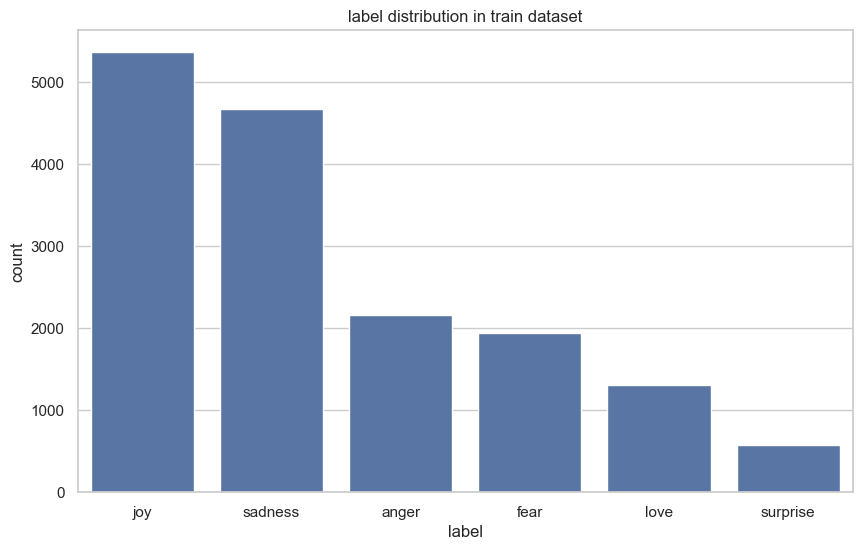

In [67]:
train_label_distribution = train_df['label'].value_counts()
plt.figure(figsize = (10,6))
sns.countplot(data = train_df, x= 'label' , order =train_label_distribution.index)
plt.title('label distribution in train dataset')
plt.xlabel('label')
plt.ylabel('count')
plt.show()

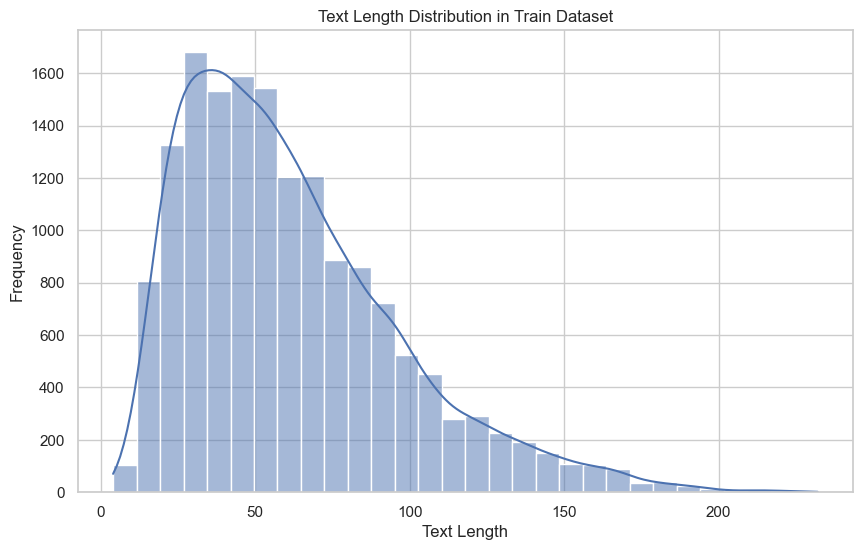

In [70]:
train_df['text_length'] = train_df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution in Train Dataset')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

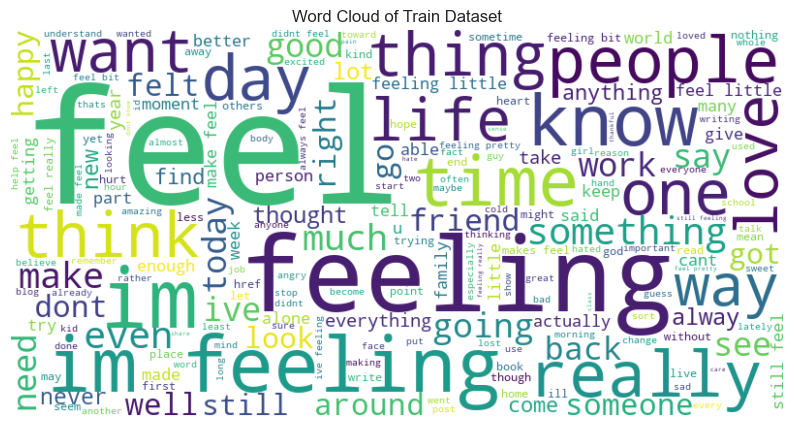

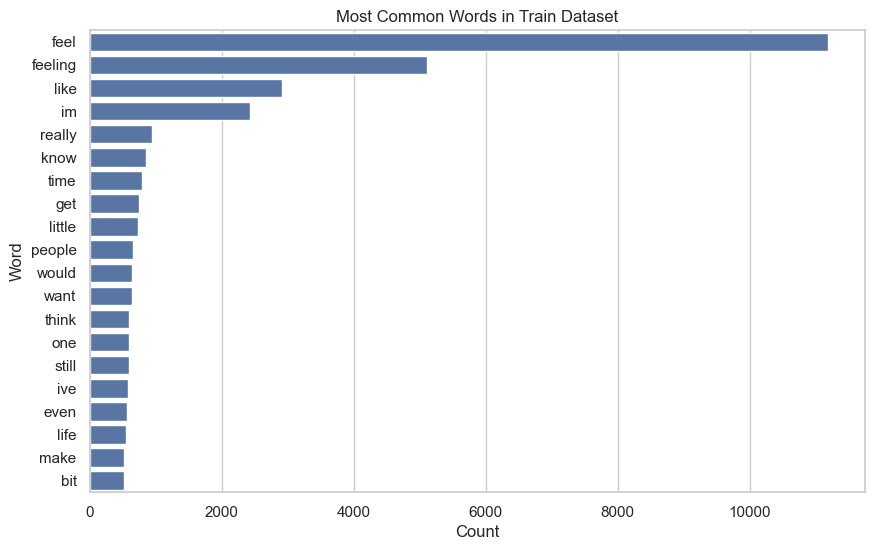

In [71]:
from collections import Counter
from  wordcloud import WordCloud

all_text = ' '.join(train_df['text'])

wordcloud =WordCloud(width = 800, height = 400 , background_color= 'white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Train Dataset')
plt.axis('off')
plt.show()
word_counts = Counter(all_text.split())
common_words = word_counts.most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])
plt.figure(figsize=(10, 6))
sns.barplot(data=common_words_df, x='count', y='word')
plt.title('Most Common Words in Train Dataset')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()


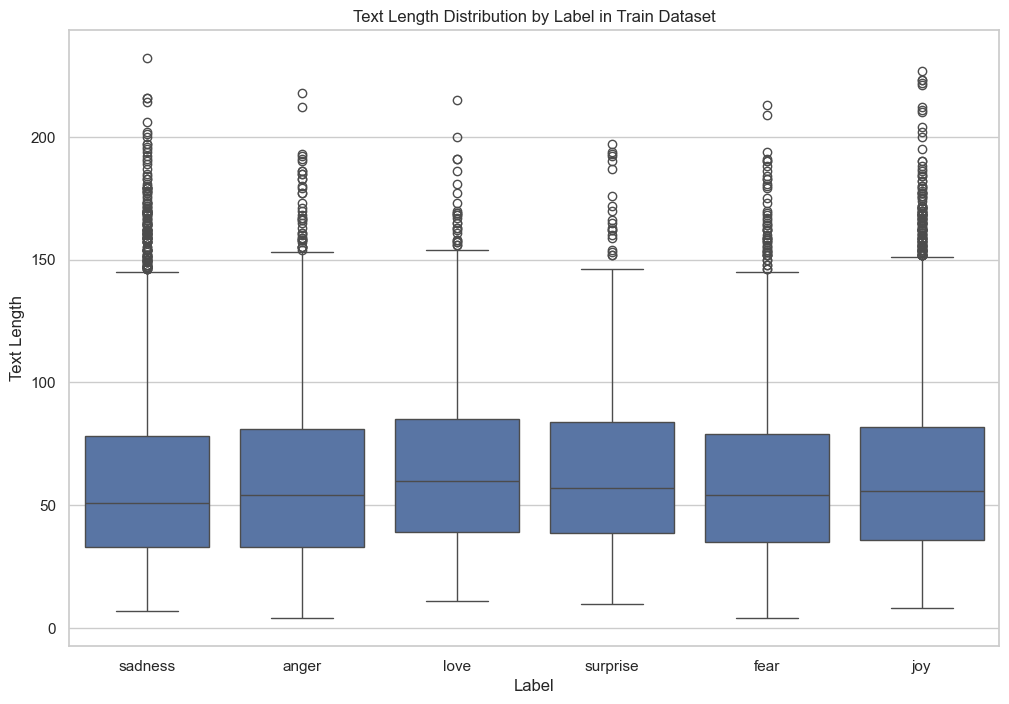

In [72]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_df, x='label', y='text_length')
plt.title('Text Length Distribution by Label in Train Dataset')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()